In [1]:
import numpy as np
import faiss
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
def draw_mnist(arr):
    plt.figure(figsize=(len(arr)*4,4))
    for index, (image) in enumerate(zip(arr)):
        plt.subplot(1, len(arr), index + 1)
        plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

Image Data Shape (1797, 64)


In [3]:
# mnist indexing
d = 64                           # dimension
nb = 100                      # database size
nq = 10                     # nb of queries

xb = digits.data.astype('float32') 
xq = digits.data[1:2].astype('float32') # Use the first image as the query vector

print('xb.shape : ', xb.shape, '\nxq.shape : ', xq.shape)

xb.shape :  (1797, 64) 
xq.shape :  (1, 64)


In [4]:
index = faiss.IndexHNSWFlat(d)   # build the index
print('index.is_trained : ', index.is_trained)

index.add(xb)                  # add vectors to the index
print('index.ntotal : ', index.ntotal)

TypeError: Wrong number or type of arguments for overloaded function 'new_IndexHNSWFlat'.
  Possible C/C++ prototypes are:
    faiss::IndexHNSWFlat::IndexHNSWFlat()
    faiss::IndexHNSWFlat::IndexHNSWFlat(int,int,faiss::MetricType)
    faiss::IndexHNSWFlat::IndexHNSWFlat(int,int)


In [ ]:
k = 10                          # we want to see top k nearest neighbors (the first result will always be the query vector)
D, I = index.search(xq, k)     # actual search
print('I[:5] : ', I[:k])                   # neighbors of the 5 first queries
print('D[:5] : ', D[:k])                   # distances of the 5 first queries

I[:5] :  [[   1   93 1120 1112 1050 1546  466 1634 1076  349]]
D[:5] :  [[  0. 203. 377. 379. 387. 452. 453. 457. 462. 479.]]


In [ ]:
arr = np.empty([0,64])
i = 0
for i in range(k):
    print('index : ', I[0,i], '\ndistance : ', D[0,i], '\narr : ', xb[I[0,i]])
    arr = np.vstack((arr, xb[I[0,i]]))
print('arr.shape : ', arr.shape)

index :  1 
distance :  0.0 
arr :  [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
index :  93 
distance :  203.0 
arr :  [ 0.  0.  0. 11. 16.  5.  0.  0.  0.  0.  0. 10. 16.  5.  0.  0.  0.  0.
  4. 16. 16.  5.  0.  0.  0. 11. 16. 16. 16.  3.  0.  0.  0.  5.  8. 14.
 16.  2.  0.  0.  0.  0.  0. 14. 16.  2.  0.  0.  0.  0.  0. 11. 16.  2.
  0.  0.  0.  0.  0.  8. 16.  8.  0.  0.]
index :  1120 
distance :  377.0 
arr :  [ 0.  0.  1. 11. 14.  5.  0.  0.  0.  0.  0. 15. 16. 11.  0.  0.  0.  0.
  5. 16. 16.  8.  0.  0.  0.  0.  5. 16. 16.  5.  0.  0.  0.  0.  4. 16.
 16.  3.  0.  0.  0.  0.  9. 16. 16.  2.  0.  0.  0.  0.  8. 16. 14.  0.
  0.  0.  0.  0.  2. 13. 16.  9.  0.  0.]
index :  1112 
distance :  379.0 
arr :  [ 0.  0.  3. 15. 12.  2.  0.  0.  0.  0.  1. 16. 16.  6.  0.

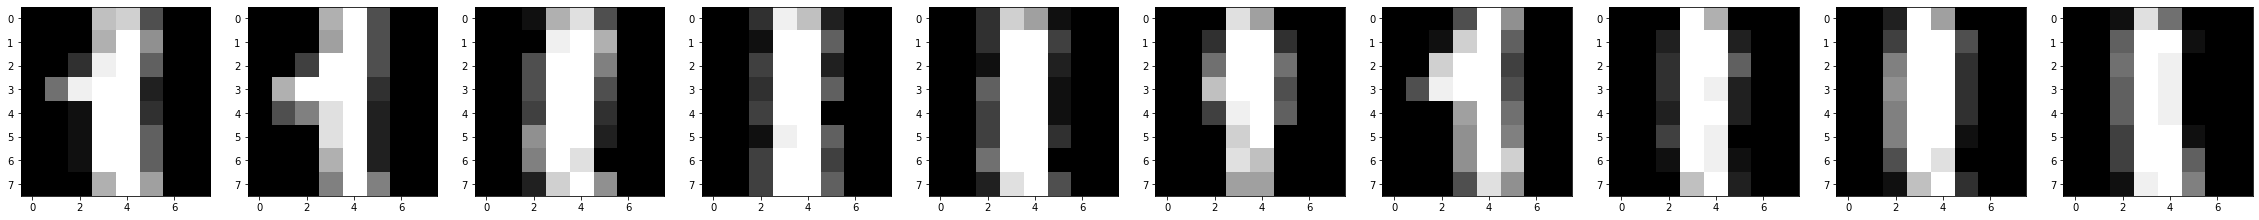

In [ ]:
draw_mnist(arr)